## Homework 3, Problem 3 on inhomogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2021, Prof. J.C. Kao, TAs T. Monsoor, S. Balla.


 In this problem, we will use the same simulated neuron as in
  Problem 2, but now the reaching angle $s$ will be time-dependent
  with the following form:
$$ s(t) = t^2 \cdot \pi,$$

where $t$ ranges between 0 and 1 second. This will be refered as *s(t)* equation in the questions.


In [2]:
"""
ECE C143/C243 Homework-3 Problem-3

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

### (a) (6 points) Spike trains
Generate 100 spike trains, each 1 second in duration, according to
an inhomogeneous Poisson process with a firing rate profile defined
by tuning equation, $$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$ 
and the $s(t)$ equation, $$ s(t) = t^2 \cdot \pi$$

In [3]:
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 # trial length (ms)

In [4]:
np.random.exponential(1.0/r_max * 1000)

17.4593451778259

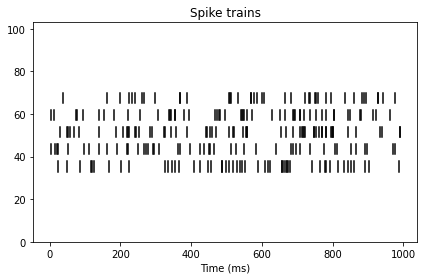

In [7]:
## 3a
num_trials = 100 # number of total spike trains
num_rasters_to_plot = 5 # number of spike trains to plot
#====================================================#
# YOUR CODE HERE:
#   Generate the spike times for 100 trials of an inhomogeneous
#   Poisson process.  Plot 5 example spike rasters.
#====================================================#
spike_times = np.empty(num_trials, dtype=list)
spike_trains = np.empty(num_trials, dtype=list)
spike_trains_list = []

for trial in range(num_trials):
    #create exponentially distributed spike times for each trial with lambda max
    spike_time = np.random.exponential(1.0/r_max * 1000)
    trial_spike_times = list()
    while spike_time <= T:
        trial_spike_times.append(spike_time)
        new_spike_time = np.random.exponential(1.0/r_max * 1000)
        spike_time = spike_time + new_spike_time
    
    spike_times[trial] = np.array(trial_spike_times)
    #print(spike_times[trial])
    #calculate probability that we keep spike Ti
    
    spike_train = []
    for time in spike_times[trial]:
        reach_angle = ((time/1000)*(time/1000)) * np.pi
        lam_time = r_0 + (r_max-r_0)*np.cos(reach_angle-s_max)
        keep_prob = lam_time/r_max
        
        #sample from uniform distribution and if greater than prob, discard, else keep
        uniform_sample = np.random.uniform()
        if uniform_sample < keep_prob:
            spike_train.append(time)
        spike_trains[trial] = np.array(spike_train)
        spike_trains_list.append(spike_train)
        
nsp.PlotSpikeRaster(spike_trains[0:num_rasters_to_plot])
plt.title('Spike trains')
plt.tight_layout()
#====================================================#
# END YOUR CODE
#====================================================#


### (b) (5 points) Spike histogram
  Plot the spike histogram by taking spike counts in non-overlapping
  20 ms bins, then averaging across the 100 trials.  The spike
  histogram should have firing rate (in spikes / second) as the
  vertical axis and time (in msec, not time bin index) as the
  horizontal axis. Plot the expected firing rate profile defined by equations
 tuning equation and *s(t)* equation on the same plot. 

Text(0.5, 0, 'Time(ms)')

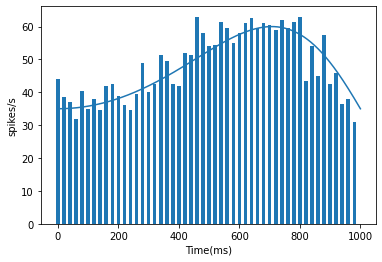

In [11]:
# 3b
bin_width = 20 # (ms)
#====================================================#
# YOUR CODE HERE:
#   Plot the spike histogram
#====================================================#
#print(spike_trains_list)
spike_counts_bins= np.zeros((num_trials, 50))
    
for rep in range(num_trials): #100
    trial_size = spike_trains[rep].size
        
    for i in range(trial_size):
        bin_num = 0
        t_in = 0
        t_out = bin_width
        while(t_out <= 1000):
            if spike_trains[rep][i]<t_out:
                if spike_trains[rep][i]>=t_in:
                    spike_counts_bins[rep,bin_num]+=1
            t_in = t_out
            t_out = t_out + bin_width
            bin_num+=1
        #print(spike_counts_bins[rep])
spike_counts_mean= np.mean(spike_counts_bins, axis=0)
spike_counts_sec = spike_counts_mean*50
#print(spike_counts_sec)
#plt.hist(np.array(spike_counts_sec), bins = 50)
plt.bar(np.arange(0,1000,20),spike_counts_sec, width=12)

t = np.linspace(0,T,1000)
reach_angle = np.pi*(t/1000)*(t/1000)

lam_time = r_0 + (r_max-r_0)*np.cos(reach_angle-s_max)
plt.plot(t, lam_time)
#====================================================#
# END YOUR CODE
#====================================================#

plt.ylabel('spikes/s')
plt.xlabel('Time(ms)')

#### Question:
Does the spike histogram agree with the expected firing rate profile?

#### Your Answer: Yes the spike historgram agrees with the expected firing rate profile.

### (c) (6 points) Count distribution
  For each trial, count the number of spikes across the entire trial.
  Plot the normalized distribution of spike counts.  Fit a Poisson
  distribution to this empirical distribution and plot it on top of
  the empirical distribution.  

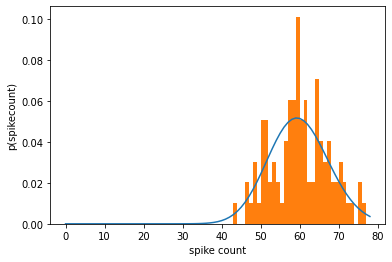

In [21]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of spike counts
#====================================================#
spike_counts = np.empty(num_trials, dtype=list)

for trial in range(num_trials):
    spike_counts[trial] = np.size(spike_times[trial])
#print(spike_counts)
max_count = np.max(spike_counts)
spike_count_bin_centers =  np.arange(0,max_count,1)
mean_spike_count = (np.sum(spike_counts))/100

import scipy.stats
mean_poisson = np.mean(spike_counts)
plt.plot(scipy.stats.poisson.pmf(mu=mean_poisson, k=np.arange(max_count)))
    #mu = mean_spike_count
    #poisson.pmf(x, mu)
    #ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

plt.hist(spike_counts, bins=spike_count_bin_centers, density=True)

#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('spike count')
plt.ylabel('p(spikecount)')
plt.show()

#### Question:
Should we expect the spike counts to be Poisson-distributed?

#### Your Answer: Yes we should expect the spike counts to be Poisson-distributed

### (d) (5 points) ISI distribution
  Plot the normalized distribution of ISIs.  Fit an exponential
  distribution to the empirical distribution and plot it on top of the
  empirical distribution. 

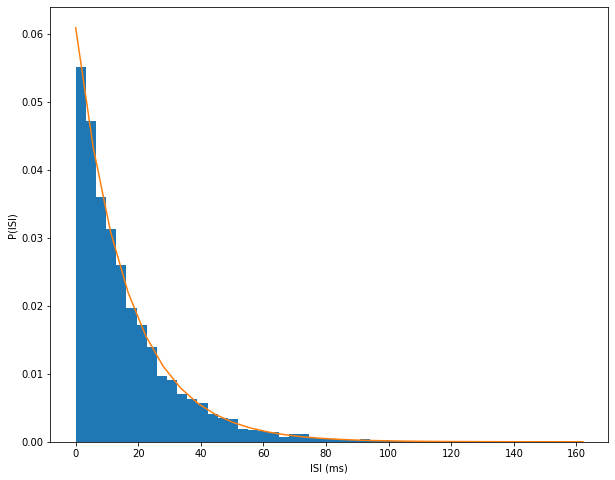

In [23]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of ISIs
#====================================================#
plt.figure(figsize=(10,8))
trial_size = spike_times.size
intervals = []
    #print(np.arange(trial_size))
for trial in np.arange(trial_size):
    intervals = np.append(intervals, np.diff(spike_times[trial]))
    
isi_mean = np.mean(intervals)
lambda_exp = 1/isi_mean
    
plt.hist(intervals, bins = 50, density= True)
max_interval = max(intervals)
t = np.linspace(0,max_interval, 30)
exp_dist = lambda_exp*np.exp(-lambda_exp*t)
plt.plot(t, exp_dist)

#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('ISI (ms)')
plt.ylabel('P(ISI)')
plt.show()

#### Question: 
Should we expect the ISIs to be exponentially-distributed?
(Note, it is possible for the  empirical distribution to strongly resemble an exponential distribution even if the data aren't exponentially distributed.)

#### Your Answer: Yes we should expect the ISIs to be exponentially-distributed